In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt 
from PIL import Image
import torch 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset, random_split 
import os

C:\Users\Herbert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_transform = transforms.Compose(
    [
       transforms.Resize((224,224)),
       transforms.RandomHorizontalFlip(p=0.5),
       transforms.RandomGrayscale(p=0.5),
       transforms.RandomRotation(10),
       transforms.ToTensor(),
       transforms.Normalize(mean=(0.5,0.5,0.5), std = (0.5,0.5,0.5))
      
    ]
)

In [3]:
test_transform = transforms.Compose(
    [
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5,0.5,0.5), std = (0.5,0.5,0.5))
    ]
)


In [33]:
root_dir = r"C:\Users\Herbert\OneDrive\Documents\Eye-disease\dataset"

In [34]:
dataset = datasets.ImageFolder(root_dir)


In [35]:
dataset.classes

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [36]:
len(dataset)

4217

In [37]:
[x for x in dir(os) if x.endswith("r")]

['chdir',
 'curdir',
 'error',
 'listdir',
 'mkdir',
 'pardir',
 'rmdir',
 'scandir',
 'strerror']

In [42]:
cataract_dir = os.listdir(root_dir+"//cataract")

In [43]:
diabetic_retinopathy_dir = os.listdir(root_dir+"//diabetic_retinopathy")

In [44]:
glaucoma_dir = os.listdir(root_dir+"//glaucoma")

In [45]:
normal_dir = os.listdir(root_dir+"//normal")

In [47]:
len(cataract_dir) , len(diabetic_retinopathy_dir) , len(glaucoma_dir), len(normal_dir)

(1038, 1098, 1007, 1074)

In [51]:
my_dict = {
    f"cataract ({len(cataract_dir)})": len(cataract_dir), 
    f"diabetic_retinopathy ({len(diabetic_retinopathy_dir)})": len(diabetic_retinopathy_dir),
    f"glaucoma ({len(glaucoma_dir)})":  len(glaucoma_dir),
    f"normal ({len(normal_dir)})": len(normal_dir),                
}

In [52]:
my_dict

{'cataract (1038)': 1038,
 'diabetic_retinopathy (1098)': 1098,
 'glaucoma (1007)': 1007,
 'normal (1074)': 1074}

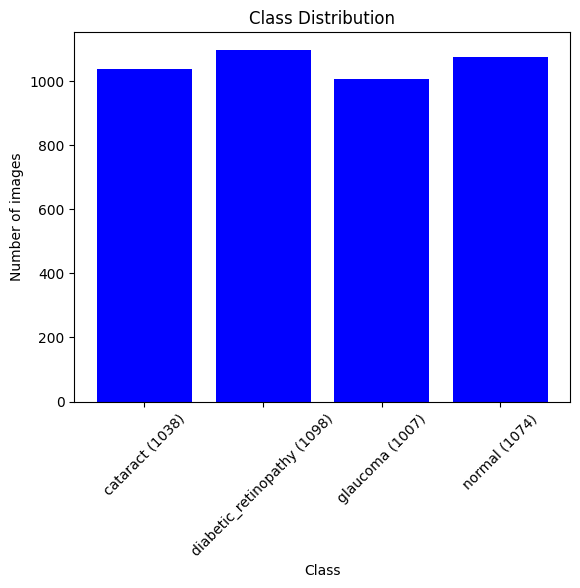

In [53]:
plt.bar(my_dict.keys(), my_dict.values(), color='blue')
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.title("Class Distribution")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

In [17]:
# Data seems unbalanced here

In [54]:
len(dataset)

4217

In [55]:
train_size = int(0.8 * (len(dataset)))
train_size

3373

In [56]:
test_size = len(dataset)-train_size
test_size

844

In [57]:
train_data, test_data = random_split(dataset,[train_size, test_size])


In [58]:
type(train_data)

torch.utils.data.dataset.Subset

In [23]:
# Manually applying transformations:

In [60]:
train_data.dataset.transform = train_transform
test_data.dataset.transform = test_transform


In [61]:
# Create Dataloaders
train_loader = DataLoader(train_data, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_data , batch_size = 32, shuffle = False)


In [62]:
type(test_loader)

torch.utils.data.dataloader.DataLoader

In [63]:
from project.cnn import model_y

In [64]:
my_model = model_y()

In [65]:
my_model

model_y(
  (full_conv): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Linear(in_features=50176, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=20, bias=True)
  )
)